# Practical Session: Networks of music preferences (LastFM dataset)

For this activity, we will create graphs using [NetworkX](https://networkx.org/) and traditional libraries for scientific computing such as [Pandas](https://pandas.pydata.org/) and [NumPy](https://numpy.org/) (data transformation and processing) plus [Matplotlib](https://matplotlib.org/) (data visualization).


## 1. About the dataset


We will use a reduced version of the LastFM dataset publicly available from works `[1-3]`. This dataset contains the recordings of 1000 users from Feb. 2005 until Jun. 2009. This dataset contains the following columns:

+ `userid`: User ID (anonymized)
+ `timestamp`: Timestamp of the record. The format is `YYYY-MM-DD` followed by `hh:mm:ss`. Example: `2009-04-08T01:57:47Z`.
+ `musicbrainz-artist-id`: Artists ID.
+ `artist-name`: Artist name.
+ `musicbarinz-track-id`: Track ID.
+ `track-name`: Track name.

For this activity, we will use the `userid`, `timestamp`, `artist-id`, and `artist-name`.

---

## 2. Objectives and structure of practical session 

### 2.1. Objectives

1. Getting to know how to create, visualize, and analyse networks using NetworkX.
2. Apply widely used topology and centrality metrics.
3. Define networks across time for longitudinal analyses. 

### 2.2. Structure

**Part I : Data Exploration.**

Explore, clean, transform, and visualize data for  further analyses.



**Part II : Analyses of network of artists.**

Create, visualize, and analyze a binary Graph $G = (V,E)$ such that $V$ correspond to a set of artists found in this dataset (i.e., vertices/nodes). Two artists $v_i$ and $v_j$ are connected by an edge $e_{ij}=(n_i, n_j) \in E$ if a user listen to both of them in a given time $t \in T$.

**Part III : Analyses of evolving networks based on user's preferences.**

Create, visualize, and analyze *weighted graphs* $G_t = (V, E_t, W_t)$ for every month $t \in T$ in our dataset. The set of nodes $V$ corresponds to a set of artists from the entire dataset. Two artists $v_{t, i}$ and $v_{t, j}$ are connected by an edge $e_{t,ij}=(n_{t,i}, n_{t,j}) \in E$ if a user listen to both of them in a given month $t$. Such edges contains a weight $w_{t,ij} \in W_t$ corresponds to the amount of users that connect both artists $v_{t,i}$ and $v_{t,j}$.

Answer to the following questions:
+ Is the network topology stable across time?
+ For this group of users, which is the most central artist? Is this most central artist the same if we use other centrality measures?
+ What are the top 10 artists more relevant based on the different centrality measures?
+ Are these centrality measures stable across time?

---

## 3. Playground

### 3.1. Part 1: Data Exploration

**Required packages**

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

**Reading dataset and data exploration**

In [2]:
#! wget https://raw.githubusercontent.com/bsotomayorg/UACh-MIN-Graph_NLP/main/dataset/DS_userid-playlist-record.tsv

In [3]:
df_timestamp = pd.read_csv("DS_userid-playlist-record.tsv", sep='\t')

In [4]:
df_timestamp

userid             timestamp  \
0       user_000001  2009-05-04T13:54:10Z   
1       user_000001  2009-05-01T08:24:50Z   
2       user_000001  2009-04-29T13:00:55Z   
3       user_000001  2009-04-26T14:56:08Z   
4       user_000001  2009-04-24T09:58:21Z   
...             ...                   ...   
191504  user_001000  2008-02-08T07:20:43Z   
191505  user_001000  2008-02-07T02:44:35Z   
191506  user_001000  2008-02-03T19:40:37Z   
191507  user_001000  2008-01-31T21:50:28Z   
191508  user_001000  2008-01-28T05:35:44Z   

                       musicbrainz-artist-id               artist-name  \
0       a7f7df4a-77d8-4f12-8acd-5c60c93f4de8                      坂本龍一   
1       a3934f47-c4cc-4e73-8b37-ce41775797d4                 Lisa Shaw   
2       495fe320-091e-43eb-9321-54a20e7c3f98       Sneaky Sound System   
3       495fe320-091e-43eb-9321-54a20e7c3f98       Sneaky Sound System   
4                                        NaN           Designed People   
...                                      ...                       ...   
191504  b7ddce8b-9e5c-46bd-9d33-41b134ce1a7f               Wolf Parade   
191505  f96627af-7aac-4e16-9245-c5661eb47199                     Muchy   
191506  e549424e-8a71-4257-acf7-18e798127cae               Katrah-Quey   
191507  a74b1b7f-71a5-4011-9441-d0b5e4122711                 Radiohead   
191508  4b2d6a23-034d-4a29-9bb9-d2462796da4e  Clap Your Hands Say Yeah   

                        musicbrainz-track-id  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3       a15efe90-1a35-4633-8888-ab4bf879527a   
4                                        NaN   
...                                      ...   
191504  27dba9c5-27de-4c07-a7bd-f279cacc34d5   
191505  30bc57a9-5646-49dd-8870-4cdca33a21f3   
191506  1d55d748-0867-4c7f-b9ec-39fbb527af86   
191507  8618e305-4289-4574-8acc-d5d8ec6b7411   
191508  30c58760-937e-40dc-8a17-78be5d657b08   

                               track-name  
0       Composition 0919 (Live_2009_4_15)  
1           Inside My Love (Extended Mix)  
2        Pictures [Radio Edit]/Radio Edit  
3                             Kansas City  
4                          Radio 808 Mars  
...                                   ...  
191504           I'Ll Believe In Anything  
191505                        Terroromans  
191506           Double Ingrown Nail June  
191507                     House Of Cards  
191508                 Details Of The War  

[191509 rows x 6 columns]

**Data cleaning**

In [5]:
print("Filas y columnas del dataset: "+str(df_timestamp.shape))
print()
print(df_timestamp.info())
print()
print("Cantidad de null en cada columnas: " + str(df_timestamp.isnull().sum()))
print()
print("Cantidad de valores duplicados: " + str(df_timestamp.duplicated().sum()))

Filas y columnas del dataset: (191509, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191509 entries, 0 to 191508
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   userid                 191509 non-null  object
 1   timestamp              191509 non-null  object
 2   musicbrainz-artist-id  185455 non-null  object
 3   artist-name            191509 non-null  object
 4   musicbrainz-track-id   169888 non-null  object
 5   track-name             191508 non-null  object
dtypes: object(6)
memory usage: 8.8+ MB
None

Cantidad de null en cada columnas: userid                       0
timestamp                    0
musicbrainz-artist-id     6054
artist-name                  0
musicbrainz-track-id     21621
track-name                   1
dtype: int64

Cantidad de valores duplicados: 0


Delete from the dataset such rows that contain `NaN`s.

In [6]:
df_timestamp = df_timestamp.dropna()

Show the amount of unique artist names in the dataset

In [7]:
df_timestamp['artist-name'].unique().shape[0]

20279

Show the amount of unique users

In [8]:
df_timestamp['userid'].unique().shape[0]

976

Show the amount of records (i.e., rows) per year and month (`YYYY-MM`) format. Use matlpotlib to create whether a histogram or scatter plot (i.e., x-axis contains the year-month and y-axis the count of records/rows.

In [9]:
#obtenemos los primeros de caracteres de columna "timestamp"
df_timestamp['timestamp'] = df_timestamp['timestamp'].str[:10]

#Convertimos a formato datatime
df_timestamp['timestamp'] = pd.to_datetime(df_timestamp['timestamp'])

/tmp/ipykernel_5582/1916171245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timestamp['timestamp'] = df_timestamp['timestamp'].str[:10]
/tmp/ipykernel_5582/1916171245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timestamp['timestamp'] = pd.to_datetime(df_timestamp['timestamp'])


In [10]:
l_year_month = df_timestamp['timestamp'].dt.to_period('M').astype(str)

(-0.5, 52.5)

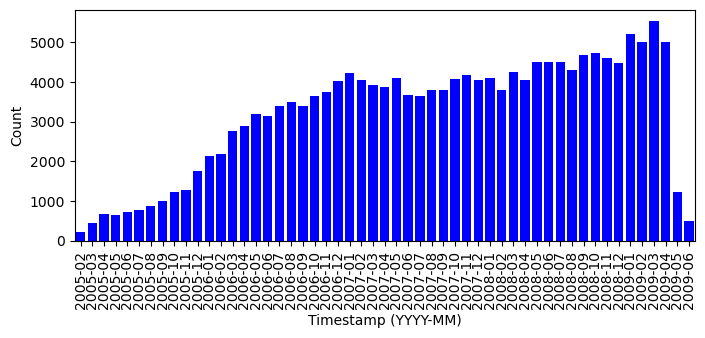

In [11]:
l_dates, l_count = np.unique(l_year_month, return_counts=True)

fig, axs = plt.subplots(figsize=(8,3), facecolor='w', ncols=1, nrows=1)
axs.bar(l_dates, l_count, color='b', lw=1)
axs.set_xlabel("Timestamp (YYYY-MM)")
axs.set_ylabel("Count")
axs.set_xticks(l_dates)
_ = axs.set_xticklabels(l_dates, rotation=90)
axs.set_xlim([-0.5, len(l_dates)-0.5])

---

### 3.2. Part 2: Creation of one single network


Definition of network based of artists based on user's preferences. To this purpose, use the data for only one month. Then, model the solution using a binary graph.


#### 3.2.1. Timestamp selection

Select only one month (e.g. Jan. 2007)

In [29]:
# Creamos la mascara
mask_month = df_timestamp['timestamp'].dt.to_period('M')
bool_mask = (mask_month=='2007-01')
np.sum(bool_mask)

4215

In [30]:
list_of_users = np.unique(df_timestamp['userid'][bool_mask])
print(list_of_users[:5])

['user_000001' 'user_000002' 'user_000003' 'user_000005' 'user_000006']


In [31]:
list_of_artists = np.unique(df_timestamp['musicbrainz-artist-id'][bool_mask])
print(list_of_artists[:10])

['000fc734-b7e1-4a01-92d1-f544261b43f5'
 '001ce2d7-c045-4343-b703-a4fc7dcee0a6'
 '0039c7ae-e1a7-4a7d-9b49-0cbc716821a6'
 '00467da8-2a92-498f-8b10-a80889bcded7'
 '004e5eed-e267-46ea-b504-54526f1f377d'
 '00565b31-14a3-4913-bd22-385eb40dd13c'
 '0065f4cc-cf21-43c2-ad52-92716a579547'
 '006f0783-c5a0-458b-a9da-f8551f7ebe77'
 '00a9f935-ba93-4fc8-a33a-993abe9c936b'
 '00b0a363-2fbc-4af7-b67d-70cf035829e7']


Get the amount of users and artists that are part of the records for the month you selected. This will be used to create the matrix of nodes/vertices and edges (i.e. $V \times E$).

In [240]:
print('Number of Users ' + str(len(list_of_users)))
print('Number of Artists ' + str(len(list_of_artists)))

Number of Users 457
Number of Artists 2082


#### 3.2.2. Definition of matrix $ V \times U$

Create a bipartite adjacency matrix of artists and users (i.e. $V \times U$) such that it stores the set of artists ($V$) that each user ($U$) listened to. 

Make sure this matrix contains only 0's and 1's as values.

In [33]:
V = len(list_of_artists) # number of artists
U =len(list_of_users) # number of users

print("V = %i; U = %i" % (V, U))

V = 2082; U = 457


Populate matrix $V \times U$ (i.e. `mat_VU`)

In [87]:
mat_UV = np.zeros(shape=(U,V))
for i in range(U):
  mask_i    = df_timestamp['userid'][bool_mask] == list_of_users[i]
  artists_i = df_timestamp['musicbrainz-artist-id'][bool_mask][mask_i].to_numpy()
  for artist in artists_i:
    index = np.where(list_of_artists == artist)[0]
    if (len(index) > 0):
      mat_UV[i,index] = 1

Check your artists-users matrix by plotting it! 

You can use `plt.imshow(mat_VU, cmap='Greys_r')` if you want.

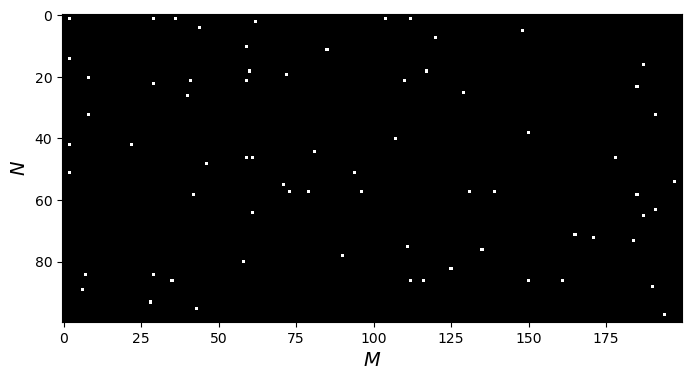

In [35]:
# this will plot only a subset of users and artists:
plt.figure(figsize=(8,4), facecolor='w')
plt.imshow(mat_UV[:,:200][:100], cmap='Greys_r', aspect='auto')
plt.xlabel("$M$", fontsize=14); 
plt.ylabel("$N$", fontsize=14); 

#### 3.2.3. Binary graph's adjacency matrix

We can define a routine to convert our artist-users matrix into a binary adjacency matrix $A$.

In order to do so, we might check whether two artists $v_i$ and $v_j$ were listened to by at least one user.

Make sure that the adjacency matrix contains only 0's and 1's! Also, consider that our binary matrix represents an undirected graph. Thus, $A$ is symmetric (and you can reduce the computations to $\frac{V \cdot (V-1)}{2}$ operations (Still $\mathcal{O}(V^2)$ tho).

In [88]:
print(mat_UV[0, :])
print(mat_UV[1, :])

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 1. ... 0. 1. 0.]


In [91]:
# users are connected by the artist they listened to 
A = np.zeros(shape=(V,V))
for i in range(V):
  for j in range(i+1, V):
    num_coincidences = np.sum((mat_UV[:,i])*(mat_UV[:,j]))
    if (num_coincidences > 0): 
      A[i,j] = 1
      A[j,i] = A[i,j]

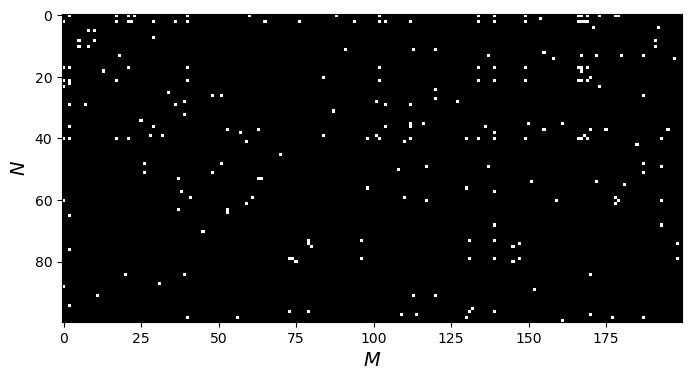

In [105]:
#Adyacency matrix
plt.figure(figsize=(8,4), facecolor='w')
plt.imshow(A[:,:200][:100], cmap='Greys_r', aspect='auto')
plt.xlabel("$M$", fontsize=14); 
plt.ylabel("$N$", fontsize=14); 


#### 3.2.4. Graph Visualization

Now, let's create a graph that contains the information have in our adjacency matrix $A$.

Using Networkx, we can create a network using the adjacency matrix as input. For example, to create a graph as `G_bin`, we do:

In [97]:
G_bin = nx.Graph(A)

We can use a circular layout as first visualization of our network:

/home/cristian/anaconda3/envs/NLP/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


(-1.209999995175484,
 1.2099999995415618,
 -1.2099986291505456,
 1.2099986249449395)

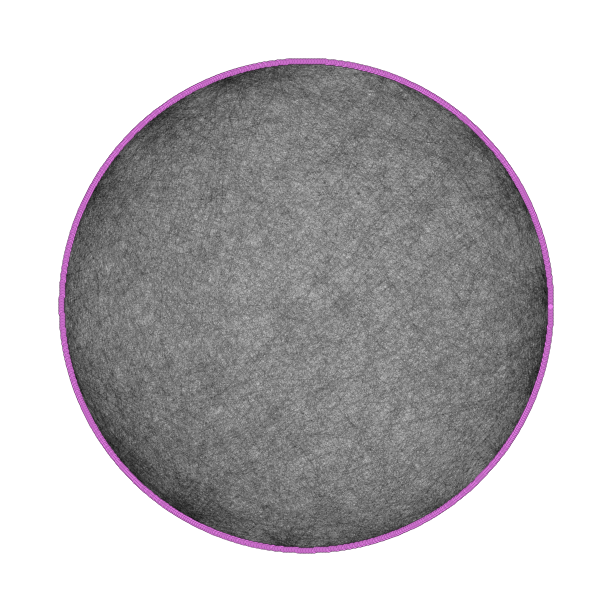

In [98]:
pos = nx.layout.circular_layout(G_bin) 
fig, axs = plt.subplots(figsize=(6,6), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
sc = nx.draw_networkx_nodes(G_bin, pos, linewidths=0.1, node_color='violet', edgecolors='k', ax=axs, cmap='Spectral_r', node_size=15)
nx.draw_networkx_edges(G_bin, pos, width=0.01, ax=axs)
axs.axis('off')

To many connections? let's try with the Spring layout:

In [99]:
pos = nx.layout.circular_layout(G_bin)
pos = nx.spring_layout(G_bin, pos=pos, k=0.7, iterations=100, seed=0)

/home/cristian/anaconda3/envs/NLP/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


(-1.126025559604168, 1.149733724296093, -1.1464921262860297, 1.133332076370716)

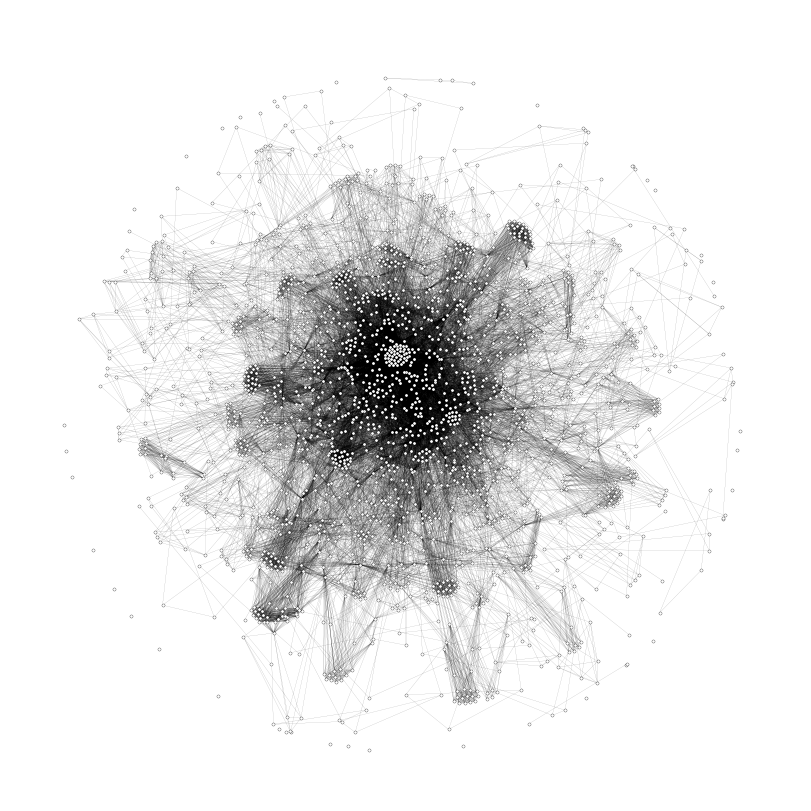

In [100]:
fig, axs = plt.subplots(figsize=(8,8), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
sc = nx.draw_networkx_nodes(G_bin, pos, linewidths=0.2, node_color='white', edgecolors='black', ax=axs, cmap='Spectral_r', node_size=5)
nx.draw_networkx_edges(G_bin, pos, edge_color='black', width=0.05, ax=axs)
axs.axis('off')

What can we observe already? Is it a full graph? 

#### 3.2.5. Visualization of the largest (main) component

Some networks may be not fully-connected. In this sub-section we will focus our analyses only in the largest component of our graph.

In order to do so, we need to detect every connected component as sub-graphs:

In [106]:
S_bin = [G_bin.subgraph(c).copy() for c in nx.connected_components(G_bin)]

In [107]:
print("Number of nodes per component:")
np.array([len(S_bin[i]) for i in range(len(S_bin))])

Number of nodes per component:


array([1960,    7,    3,    7,    3,    2,    5,    4,    5,    2,    4,
          1,    1,    3,    4,    1,    3,    7,    1,    5,    1,    1,
          3,    4,    4,    1,    3,    1,    1,    1,    1,    1,    1,
          4,    1,    2,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    2,    1,    1,    1,
          1,    1,    1,    1])

Let's visualize the largest components using circular and spring layouts:

In [108]:
# computing layouts
pos = nx.layout.circular_layout(S_bin[0])
pos = nx.spring_layout(S_bin[0], pos=pos, k=0.35, iterations=100, seed=0)

(-1.1800384244322777,
 1.1254277548193932,
 -1.208393433690071,
 1.1930928021669387)

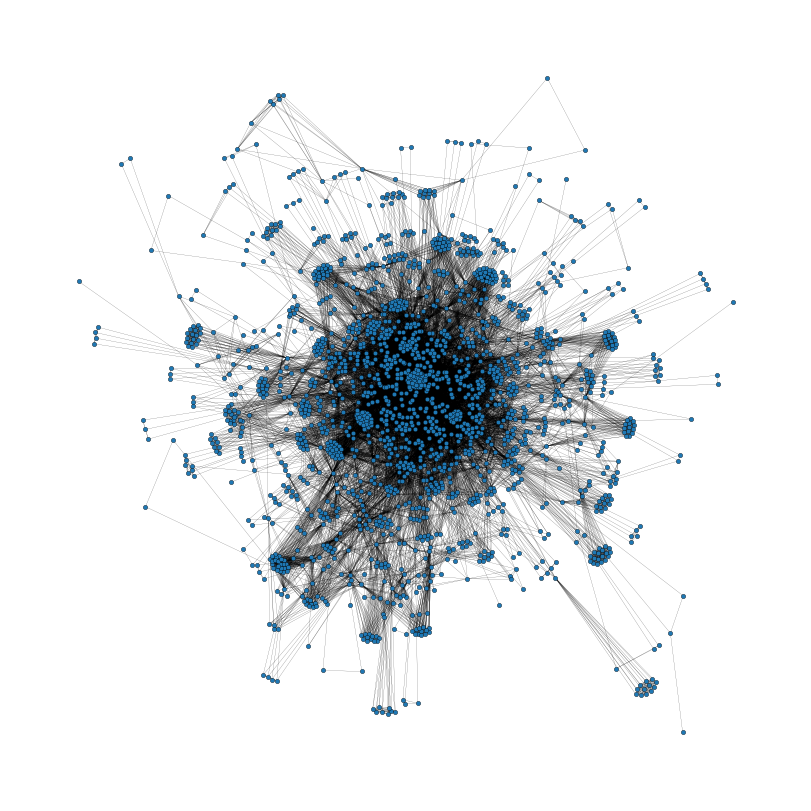

In [109]:
fig, axs = plt.subplots(figsize=(8,8), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
sc = nx.draw_networkx_nodes(S_bin[0], pos, linewidths=0.25, edgecolors='k', ax=axs, cmap='Spectral_r', node_size=10)
nx.draw_networkx_edges(S_bin[0], pos, width=0.1, ax=axs)
axs.axis('off')

**Note:** We are considering one month and the connection only needs one shared artist.

#### 3.2.6. Topology analysis of the largest component

How is the structure of our largest sub-graph? In this part, we need to compute some topology measures. Specifically, we will compute:
+ the network size, 
+ number of links, 
+ average degree, 
+ density, 
+ average clustering coefficient, 
+ average number of triangles, and 
+ average path length.

In [110]:
def get_topology_values(G):
  # input:
  # G: Networkx Graph
  # out:
  # dict (key: metric name, value: metric value)

  d_topology_vals = {
      "network_size" : G.number_of_nodes(),
      "number_of_links" : G.number_of_edges(),
      "avg_degree" : np.mean(list(dict(G.degree()).values())),
      "density" : nx.density(G),
      "accumulated_degeree" : np.sum(list(dict(G.degree()).values())),
      "avg_clustering_coef" : nx.average_clustering(G),
      "avg_triangles" : np.mean(list(nx.triangles(G).values())),
      "avg_path_length" : nx.average_shortest_path_length(G),
  }

  return d_topology_vals

In [111]:
sorted_index = np.argsort([ len(S_bin[i]) for i in range(len(S_bin))])[::-1]

In [112]:
topology_comp_1 = get_topology_values(S_bin[sorted_index[0]])
topology_comp_2 = get_topology_values(S_bin[sorted_index[1]])

In [113]:
topology_comp_1

{'network_size': 1960,
 'number_of_links': 24447,
 'avg_degree': 24.945918367346938,
 'density': 0.012734006313091852,
 'accumulated_degeree': 48894,
 'avg_clustering_coef': 0.8531065303175233,
 'avg_triangles': 367.5887755102041,
 'avg_path_length': 3.025282057692909}

In [114]:
topology_comp_2

{'network_size': 7,
 'number_of_links': 21,
 'avg_degree': 6.0,
 'density': 1.0,
 'accumulated_degeree': 42,
 'avg_clustering_coef': 1.0,
 'avg_triangles': 15.0,
 'avg_path_length': 1.0}

#### 3.2.7. Centrality analysis of the largest connected component

In this case, let's analyse the centrality of each node from only the largest connected component. We will use four centrality measures:
1. Degree centrality (`nx.degree_centrality()`)
2. Betweenness centrality (`nx.betweenness_centrality()`)
3. Closeness centrality (`nx.closeness_centrality()`)
4. Eigen-vector centrality (`nx.eigenvector_centrality()`)

Use the attribute `node_color` of  `nx.draw_networkx_nodes` to color each node based on its centrality value!

In [115]:
degree_centrality = np.array(list(nx.degree_centrality(S_bin[0]).values()))
degree_centrality[:10]

array([0.07554875, 0.0086779 , 0.09749872, 0.00204186, 0.00408372,
       0.00510465, 0.00204186, 0.00255232, 0.02348137, 0.00153139])

In [116]:
# computing layouts
pos = nx.layout.circular_layout(S_bin[0])
pos = nx.spring_layout(S_bin[0], pos=pos, k=0.9, iterations=100, seed=0)

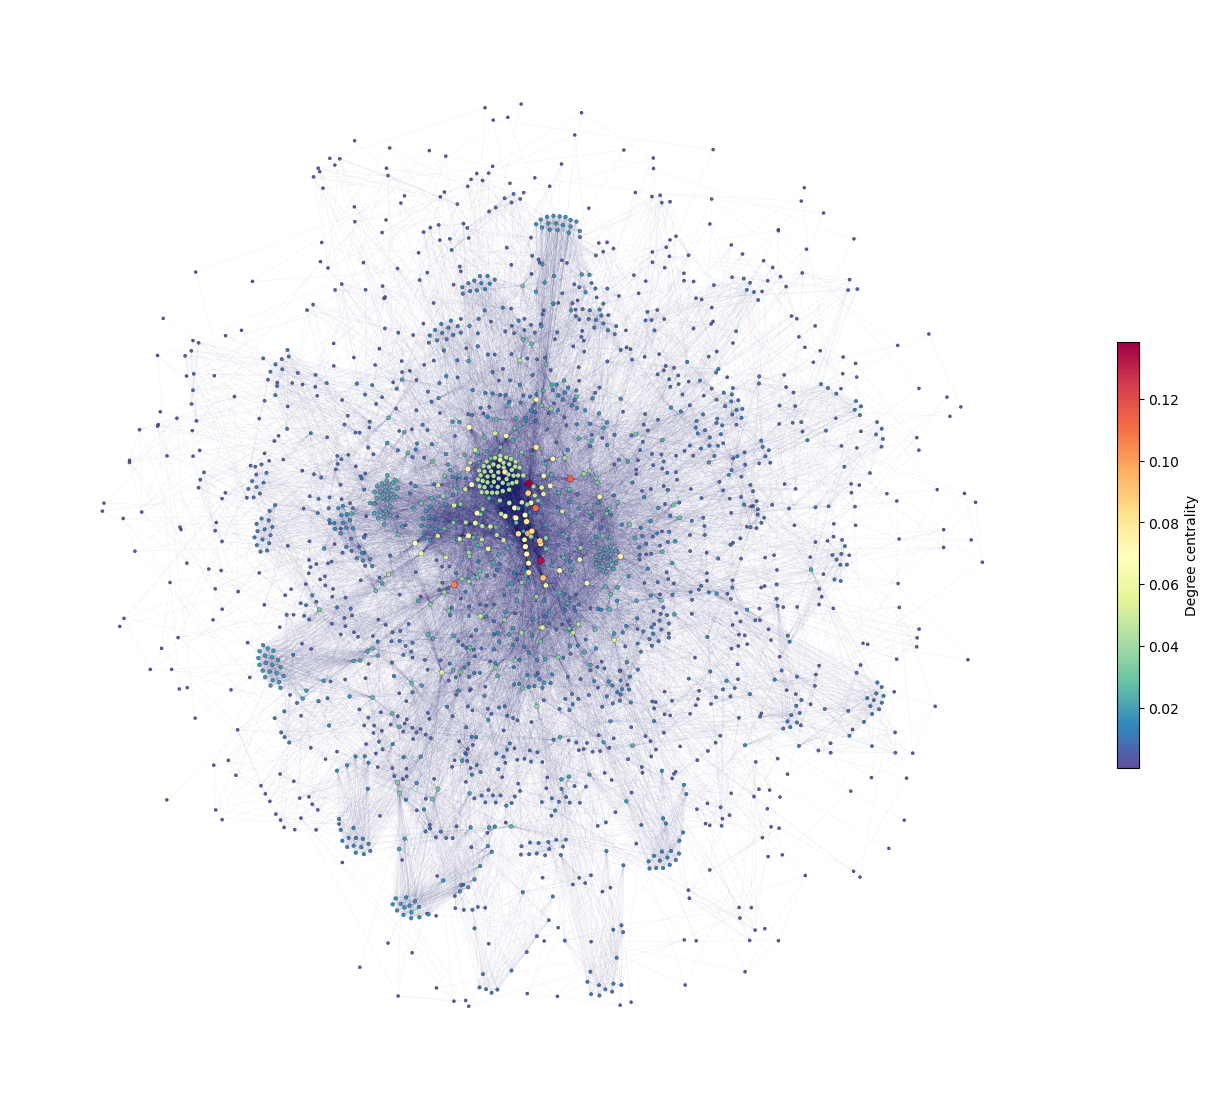

In [117]:
node_color = degree_centrality # np.log(degree_centrality) 
fig, axs = plt.subplots(figsize=(12,11), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
sc = nx.draw_networkx_nodes(S_bin[0], pos, linewidths=0.15, node_color=node_color, edgecolors='k', ax=axs, cmap='Spectral_r', node_size=5.+(150*node_color))
nx.draw_networkx_edges(S_bin[0], pos, edge_color='midnightblue', alpha=0.1, width=0.2, ax=axs)
axs.axis('off')
cbar=plt.colorbar(sc, ax=axs,fraction=0.02, pad=0.04)
cbar.set_label("Degree centrality")

In [120]:
closeness_centrality   = np.array(list(nx.closeness_centrality(S_bin[0]).values())) # TODO
betweenness_centrality = np.array(list(nx.betweenness_centrality(S_bin[0]).values())) # TODO
eigenvector_centrality = np.array(list(nx.eigenvector_centrality(S_bin[0]).values())) # TODO

Let's visualize the graph coloring nodes using: (1) `closeness_centrality`, (2) `betweenness_centrality`, and (3) `eigenvector_centrality`.




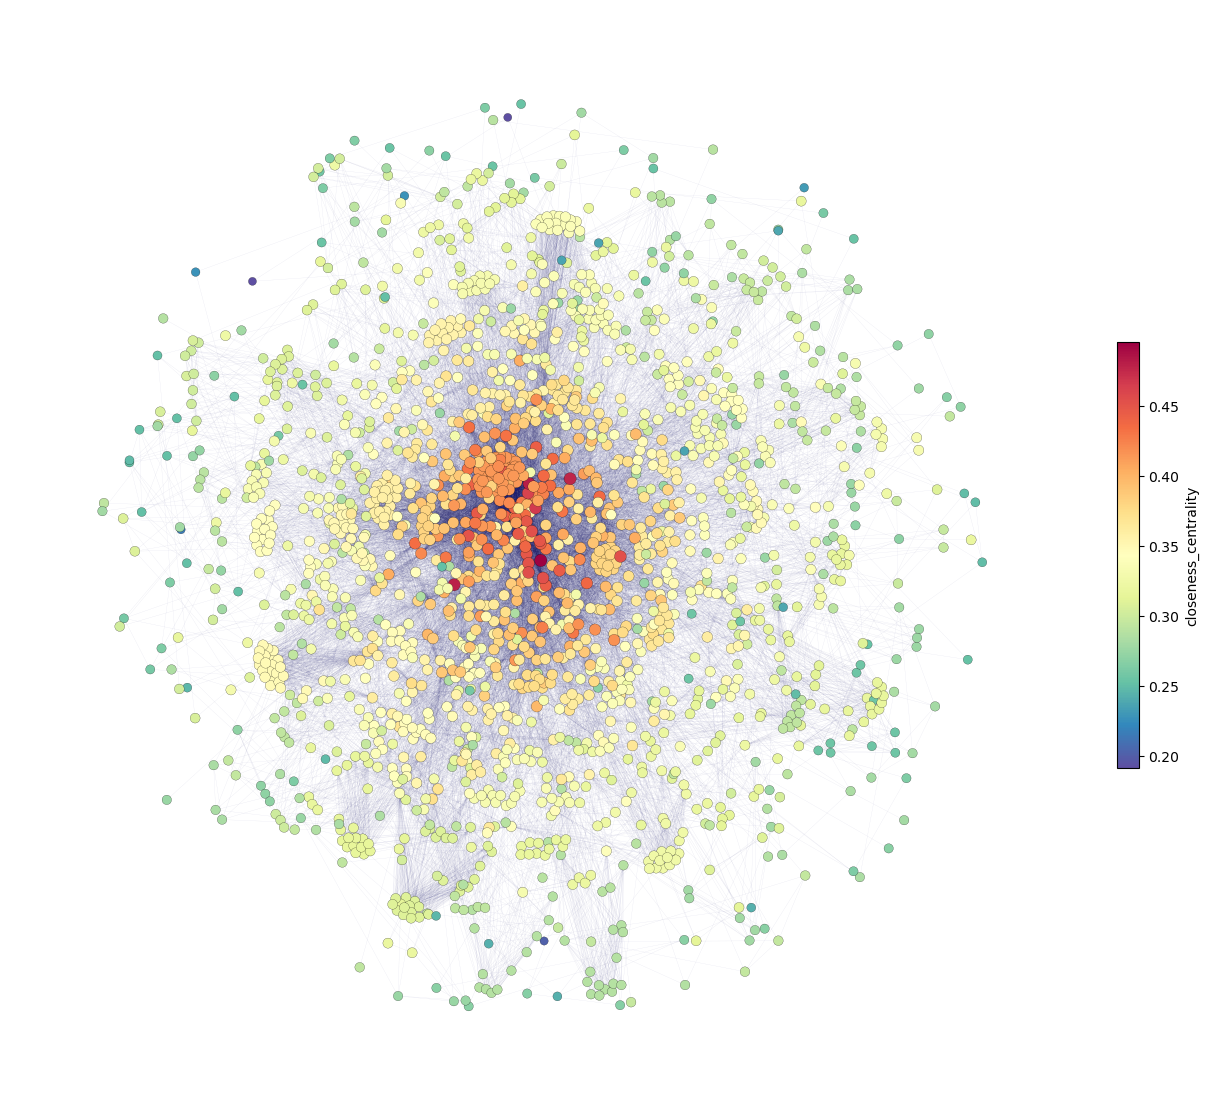

In [130]:
node_color = closeness_centrality
fig, axs = plt.subplots(figsize=(12,11), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
sc = nx.draw_networkx_nodes(S_bin[0], pos, linewidths=0.15, node_color=node_color, edgecolors='k', ax=axs, cmap='Spectral_r', node_size=5.+(150*node_color))
nx.draw_networkx_edges(S_bin[0], pos, edge_color='midnightblue', alpha=0.1, width=0.2, ax=axs)
axs.axis('off')
cbar=plt.colorbar(sc, ax=axs,fraction=0.02, pad=0.04)
cbar.set_label("closeness_centrality")

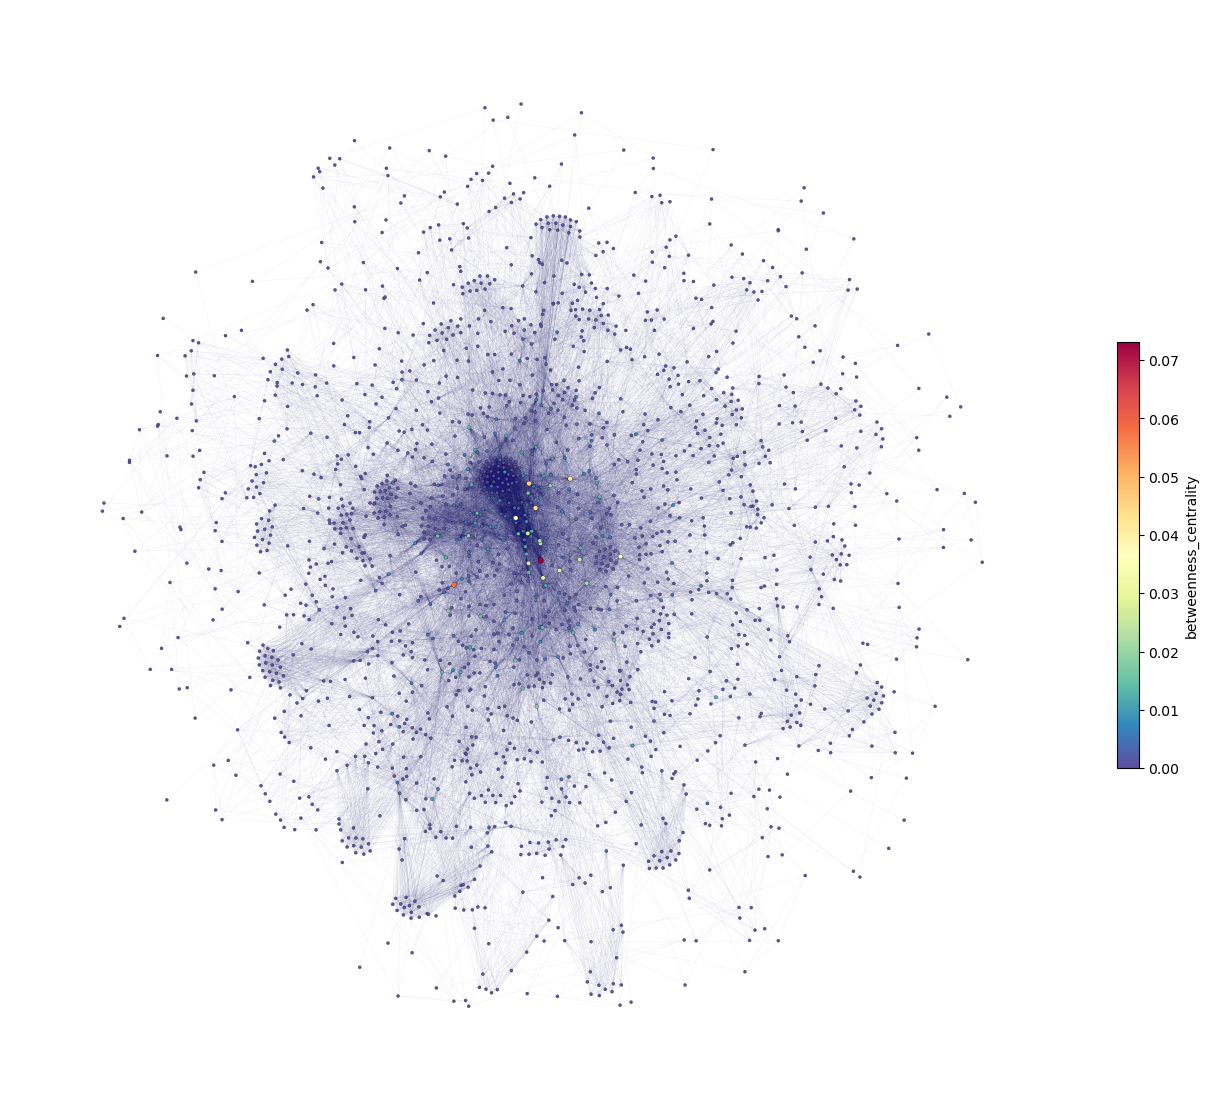

In [131]:
node_color = betweenness_centrality
fig, axs = plt.subplots(figsize=(12,11), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
sc = nx.draw_networkx_nodes(S_bin[0], pos, linewidths=0.15, node_color=node_color, edgecolors='k', ax=axs, cmap='Spectral_r', node_size=5.+(150*node_color))
nx.draw_networkx_edges(S_bin[0], pos, edge_color='midnightblue', alpha=0.1, width=0.2, ax=axs)
axs.axis('off')
cbar=plt.colorbar(sc, ax=axs,fraction=0.02, pad=0.04)
cbar.set_label("betweenness_centrality")

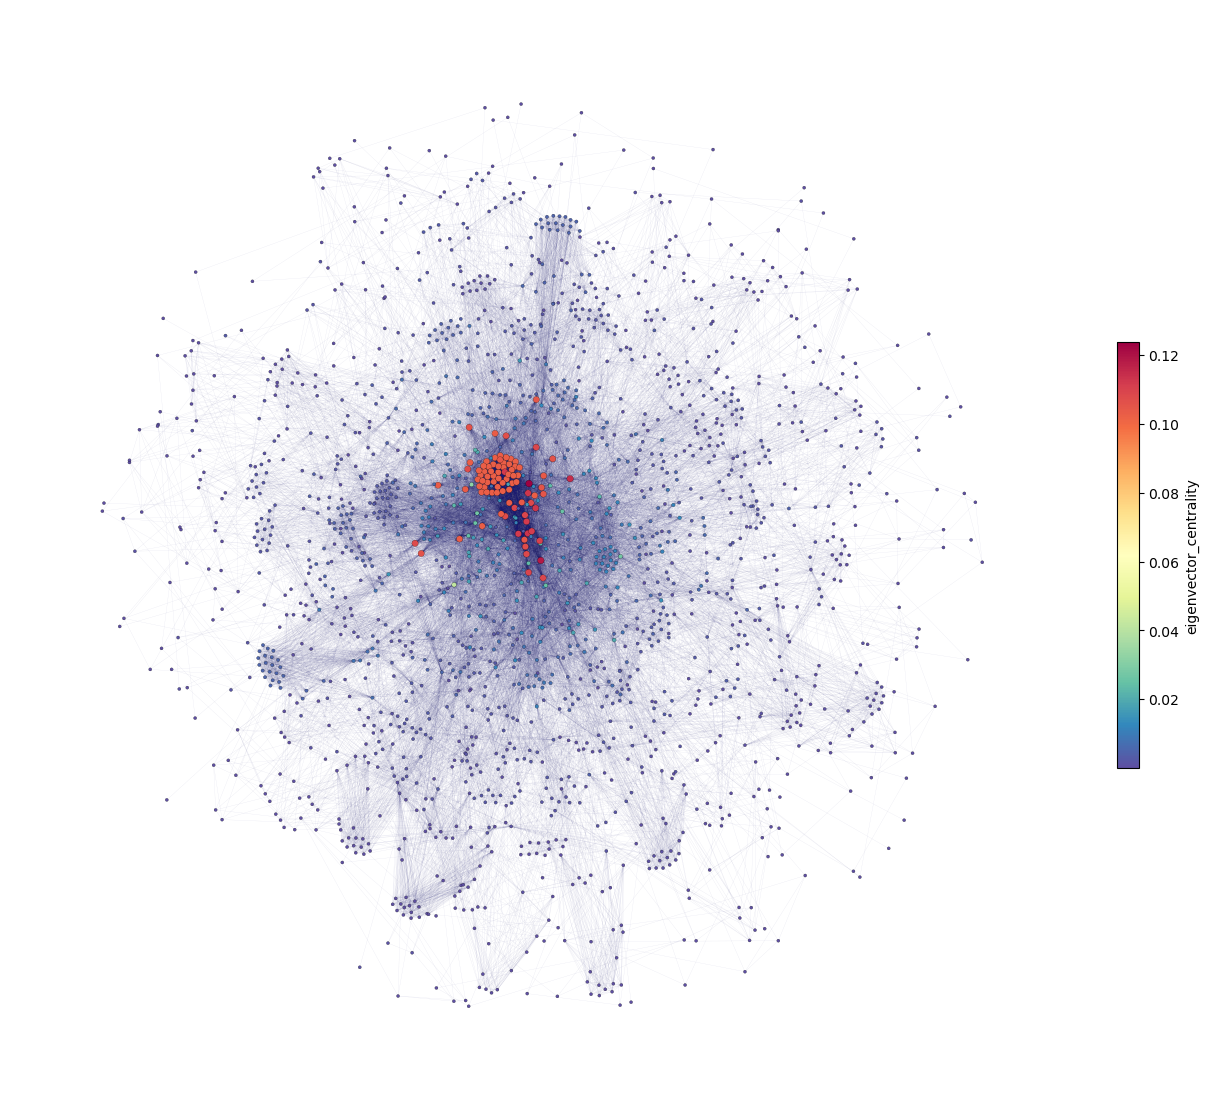

In [132]:
node_color = eigenvector_centrality
fig, axs = plt.subplots(figsize=(12,11), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
sc = nx.draw_networkx_nodes(S_bin[0], pos, linewidths=0.15, node_color=node_color, edgecolors='k', ax=axs, cmap='Spectral_r', node_size=5.+(150*node_color))
nx.draw_networkx_edges(S_bin[0], pos, edge_color='midnightblue', alpha=0.1, width=0.2, ax=axs)
axs.axis('off')
cbar=plt.colorbar(sc, ax=axs,fraction=0.02, pad=0.04)
cbar.set_label("eigenvector_centrality")

#### 3.2.8. Comparison of centrality distributions

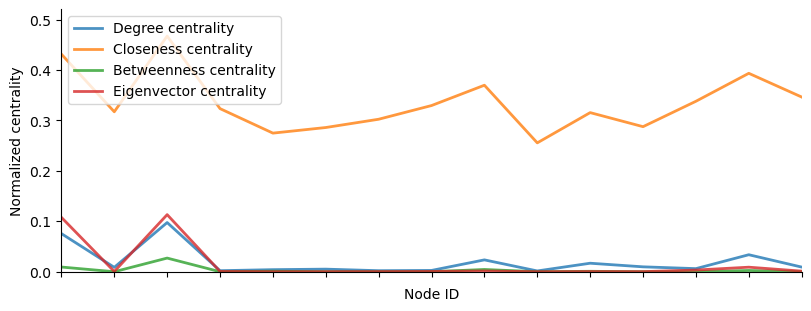

In [126]:
alpha = 0.8; lw=2
fig, axs = plt.subplots(figsize=(8, 3), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
axs.plot(degree_centrality     , lw=lw, alpha=alpha, label='Degree centrality')
axs.plot(closeness_centrality  , lw=lw, alpha=alpha, label='Closeness centrality')
axs.plot(betweenness_centrality, lw=lw, alpha=alpha, label='Betweenness centrality')
axs.plot(eigenvector_centrality, lw=lw, alpha=alpha, label='Eigenvector centrality')
axs.set_xlim([0,14]); axs.set_ylim(bottom=0)
axs.set_xticks(range(15)); axs.set_xticklabels([])
axs.set_ylabel("Normalized centrality")
axs.set_xlabel("Node ID")
axs.spines[['right', 'top']].set_visible(False)
axs.legend()

In [122]:
scaled_degree_centrality      = (degree_centrality - np.min(degree_centrality))/(np.max(degree_centrality) - np.min(degree_centrality))
scaled_closeness_centrality   = (closeness_centrality - np.min(closeness_centrality))/(np.max(closeness_centrality) - np.min(closeness_centrality))
scaled_betweenness_centrality = (betweenness_centrality - np.min(betweenness_centrality))/(np.max(betweenness_centrality) - np.min(betweenness_centrality))
scaled_eigenvector_centrality = (eigenvector_centrality - np.min(eigenvector_centrality))/(np.max(eigenvector_centrality) - np.min(eigenvector_centrality))


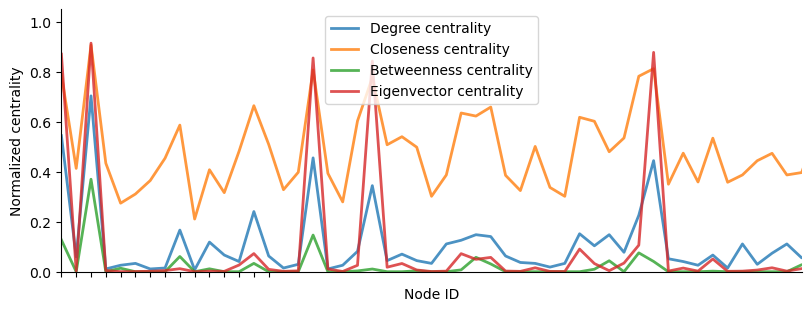

In [127]:
alpha = 0.8; lw=2
fig, axs = plt.subplots(figsize=(8, 3), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
axs.plot(scaled_degree_centrality     , lw=lw, alpha=alpha, label='Degree centrality')
axs.plot(scaled_closeness_centrality  , lw=lw, alpha=alpha, label='Closeness centrality')
axs.plot(scaled_betweenness_centrality, lw=lw, alpha=alpha, label='Betweenness centrality')
axs.plot(scaled_eigenvector_centrality, lw=lw, alpha=alpha, label='Eigenvector centrality')
axs.set_xlim([0,50]); axs.set_ylim(bottom=0)
axs.set_xticks(range(15)); axs.set_xticklabels([])
axs.set_ylabel("Normalized centrality")
axs.set_xlabel("Node ID")
axs.spines[['right', 'top']].set_visible(False)
axs.legend()

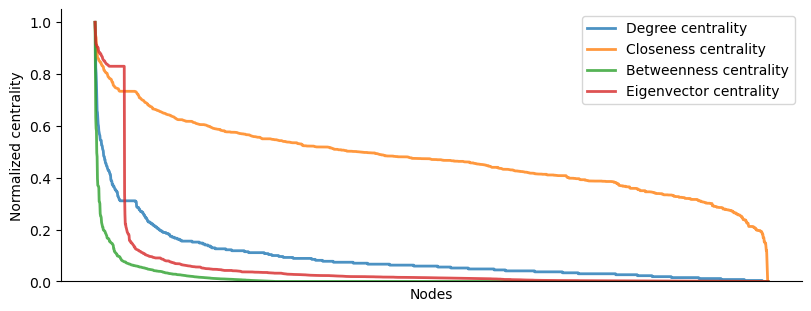

In [128]:
alpha = 0.8; lw=2
fig, axs = plt.subplots(figsize=(8, 3), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
axs.plot(np.sort(scaled_degree_centrality)[::-1]     , lw=lw, alpha=alpha, label='Degree centrality')
axs.plot(np.sort(scaled_closeness_centrality)[::-1]  , lw=lw, alpha=alpha, label='Closeness centrality')
axs.plot(np.sort(scaled_betweenness_centrality)[::-1], lw=lw, alpha=alpha, label='Betweenness centrality')
axs.plot(np.sort(scaled_eigenvector_centrality)[::-1], lw=lw, alpha=alpha, label='Eigenvector centrality')
#axs.set_xlim([0,50]); 
axs.set_ylim(bottom=0)
axs.set_xticks([])
axs.set_ylabel("Normalized centrality")
axs.set_xlabel("Nodes")
axs.spines[['right', 'top']].set_visible(False)
axs.legend()

#### 3.2.9. Questions

1. Which are the set of artists that connect the largest amount of users?
2. Which are the sets of artitsts that connect the top 10 artists more importants for connecting users? How to interpret each centrality measure in this case?

In [213]:
list_of_artist_names = df_timestamp['artist-name'][bool_mask].to_numpy()
list_of_artist_names

array(['4Hero', 'Something Corporate', 'Hot Hot Heat', ...,
       "Margot & The Nuclear So And So'S", 'Mogwai', 'Liars'],
      dtype=object)

In [234]:
top_artists_degree = [list_of_artist_names[i] for i in np.argsort(degree_centrality)[-10:][::-1]]  
top_artists_betweenness = [list_of_artist_names[i] for i in np.argsort(betweenness_centrality)[-10:][::-1]]
top_artists_closeness = [list_of_artist_names[i] for i in np.argsort(closeness_centrality)[-10:][::-1]]
top_artists_eigenvector = [list_of_artist_names[i] for i in np.argsort(eigenvector_centrality)[-10:][::-1]]


Depending in the centrality measure we are using we will get different results. Here, the "importance" of each artists have changed across metrics. Therefore, we need to consider the definition of each measure depending on what we want to measure from the network. Thus, this will change depending on the problem domain.

In [221]:
from functools import reduce

In [236]:
reduce(np.intersect1d, (top_artists_degree, top_artists_betweenness, top_artists_closeness, top_artists_eigenvector))

array(['Hot Hot Heat', 'Limbonic Art', 'Smoke Or Fire', 'Sun Kil Moon',
       'The Doors'], dtype='<U19')

**Note:** Remember, when you scale your data, you are changing the *range* of these values. When you normalize your data, you are changing the *shape of the distribution* of your data.


Good! Now that we have some information about the structure of our network, let's study how this evolves across time (i.e. months).

----

### 3.3. Part 3: Complex network analysis across months
	

In this section, we want to answer the following questions:
+ Study network of artists interconnected by LastFM user's preferences per month. Is the network of artist constantly changing? What are the features (i.e., topology measures) of the each network? Do these results change if we use weighted graphs instead of binary ones?
+ Which is the most central artist per month? Is it the same one? Is it the same if we use another centrality measure?
+ Which are the most top 3 similar artists of most central one?

Are these artists connected always in the same way? How their relation change across months? Using our LastFM dataset, we can check that by creating networks per month. We can look at the different topology measures and see whether they remain the same or fluctuate.

#### 3.3.1. Timestamp selection and filtering

In [ ]:
l_year_month = np.array([ item[:7] for item in df_timestamp['timestamp'].to_numpy()])

In [ ]:
l_unique_year_month = np.unique(l_year_month)
l_unique_year_month

In [ ]:
T = len(l_unique_year_month)
T

In [ ]:
# list of artists from the whole period of time
list_of_artists = np.unique(df_timestamp['musicbrainz-artist-id'])
print("# artists = %i" % len(list_of_artists))

For computational costs, let's consider only the first TOP-50 artists for our analyses (i.e., `max_V = 50`).


In [ ]:
_, counts = np.unique(df_timestamp['musicbrainz-artist-id'], return_counts=True)

In [ ]:
sorted_index = np.argsort(counts)[::-1]

In [ ]:
plt.figure(figsize=(3,3), facecolor='w')
plt.plot(counts[ sorted_index ])
plt.ylabel("frequency")

In [ ]:
list_of_users = np.unique(df_timestamp['userid'])

In [ ]:
U = list_of_users.shape[0]
V = list_of_artists.shape[0]

print("U = %i; V = %i" % (U, V))

In [ ]:
V = 50
list_of_artists = np.unique(df_timestamp['musicbrainz-artist-id'])[sorted_index][:V]

In [ ]:
plt.figure(figsize=(3,3), facecolor='w')
plt.plot(counts[ sorted_index ])
plt.axvline(V, ls='--', color='k')
plt.ylabel("frequency")

#### 3.3.2 Definition of matrix $V \times U \times T$

In [ ]:
%%time
# create a matrix NxM per period t in T
mat_VUT = np.zeros(shape=(U,V,T))
for t in range(T):
  temp_year_month = l_unique_year_month[t]
  bool_mask = (l_year_month==temp_year_month)
  print('processing %s (%i out %i)' % (temp_year_month, t+1, T))
  
  for i in range(U):
    mask_i = df_timestamp['userid'][bool_mask] == list_of_users[i]
    artists_i = df_timestamp['musicbrainz-artist-id'][bool_mask][mask_i].to_numpy()
    for artist in artists_i:
      index = np.where(list_of_artists == artist)[0]
      if (len(index) > 0):
        mat_VUT[i, index, t] += 1

#### 3.3.3. Weighted graph's adjacency matrix per month

In [ ]:
def create_adjacency_matrices(mat_VUT, T_limit=0):
  # Create adyacency matrices per period
  # users are connected by the artist they listened to
  U, V, T = mat_VUT.shape
  if T_limit>0:
    T = T_limit
  A_T = np.zeros(shape=(V,V,T))
  for t in range(T):
    for i in range(V):
      for j in range(i+1, V):
        num_coincidences = np.sum(mat_VUT[:,i,t] * mat_VUT[:,j,t])
        if (num_coincidences > 0): 
          A_T[i,j,t] += # TODO
          A_T[j,i,t] = A_T[i,j,t]
  return A_T

In [ ]:
%%time
A_T = create_adjacency_matrices(mat_VUT, T_limit=T)

In [ ]:
A_T.shape

In [ ]:
current_T = A_T.shape[2]

In [ ]:
l_G = [nx.Graph(A_T[:,:,t]) for t in range(current_T)]

#### 3.3.4. Graph visualizations

Visualization pf graphs and adjacency matrices across time

In [ ]:
pos = nx.layout.circular_layout(l_G[0])
pos = nx.spring_layout(l_G[0], k=0.1, pos=pos, iterations=100, seed=0)
pos = nx.spring_layout(l_G[0], pos=pos, iterations=100, seed=0)

In [ ]:
fig, axs = plt.subplots(figsize=(3,3), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
sc = nx.draw_networkx_nodes(l_G[0], pos, linewidths=0.1, edgecolors='k', ax=axs, cmap='Spectral_r', node_size=10)
nx.draw_networkx_edges(l_G[0], pos, width=0.1, ax=axs)
axs.axis('off')

In [ ]:
plot_T = 5 # amount of graphs to visualize

In [ ]:
fig, axs = plt.subplots(figsize=(3*plot_T,6), facecolor="w", nrows=2, ncols=plot_T)
for t in range(plot_T):
  # graph visualization
  nx.draw_networkx_nodes(
      l_G[t], pos, node_color='purple', linewidths=0.5, 
      edgecolors='k', ax=axs[0][t], node_size=10)
  nx.draw_networkx_edges(l_G[t], pos, width=0.1, ax=axs[0][t])
  axs[0][t].spines[['left', 'right', 'top', 'bottom']].set_visible(False)
  axs[0][t].set_title("$G_{t=%i}$" % (t+1), fontsize=18)
  
  # adjacency matrix
  axs[1][t].imshow(A_T[:,:,t], cmap="Greys_r")
  axs[1][t].imshow(A_T[:,:,t], cmap="Greys_r")
  axs[1][t].set_xticks([]); axs[1][t].set_yticks([]);

In [ ]:
# [np.unique(nx.adjacency_matrix(l_G[t]).todense(), return_counts=True) for t in range(len(l_G))]

#### 3.3.5. Analysis across time: Changes in networks' topology 

In [ ]:
def compute_features_from_graph(G):
  d_features = {
    'mean_degree' : np.mean(list(dict(G.degree()).values())),
    'density' : nx.density(G),
    'num_edges' : G.number_of_edges(),
    'num_connected_components' : nx.number_connected_components(G),
    'mean_clustering_coef' : nx.average_clustering(G),
    'num_triangles' : np.mean(list(dict(nx.triangles(G)).values()))
  }
  return d_features

In [ ]:
l_features = [compute_features_from_graph(l_G[t]) for t in range(len(l_G))]


In [ ]:
df_features = pd.DataFrame(l_features)
df_features

#### 3.3.6. Visualization of changes of networks structure

In [ ]:
fig, axs = plt.subplots(figsize=(12,2), facecolor='w')
plt.plot(l_unique_year_month, df_features['mean_degree'])
axs.set_xlabel("Year and month (YYYY-MM)")
axs.set_ylabel("mean_degree")
axs.set_xticklabels(l_unique_year_month, rotation=90)
axs.set_xlim([-0.5, len(l_unique_year_month)-0.5])

In [ ]:
fig, axs = plt.subplots(figsize=(12,2), facecolor='w')
plt.plot(l_unique_year_month, df_features['num_connected_components'])
axs.set_xlabel("Year and month (YYYY-MM)")
axs.set_ylabel("num_connected_components")
axs.set_xticklabels(l_unique_year_month, rotation=90)
axs.set_xlim([-0.5, len(l_unique_year_month)-0.5])

In [ ]:
fig, axs = plt.subplots(figsize=(12,2), facecolor='w')
plt.plot(l_unique_year_month, df_features['mean_clustering_coef'])
axs.set_xlabel("Year and month (YYYY-MM)")
axs.set_ylabel("mean_clustering_coef")
axs.set_xticklabels(l_unique_year_month, rotation=90)
axs.set_xlim([-0.5, len(l_unique_year_month)-0.5])

In [ ]:
fig, axs = plt.subplots(figsize=(12,2), facecolor='w')
plt.plot(l_unique_year_month, df_features['num_edges'])
axs.set_xlabel("Year and month (YYYY-MM)")
axs.set_ylabel("num_edges")
axs.set_xticklabels(l_unique_year_month, rotation=90)
axs.set_xlim([-0.5, len(l_unique_year_month)-0.5])

#### 3.3.7. Centrality analysis across time

In [ ]:
largest_cc = max(nx.connected_components(l_G), key=len)
len(largest_cc)

In [ ]:
node_main_component = np.array([ np.array(list(max(nx.connected_components(l_G[t]), key=len))) for t in range(10,40)])

In [ ]:
node_main_component[0]

In [ ]:
# nodes in t=10 AND t=20
np.intersect1d(node_main_component[0], node_main_component[10]) 

In [ ]:
common_nodes = reduce(np.intersect1d, node_main_component)

Let's select such nodes (and their connections) that are common across the dataset from epoch 10 to 40:

In [ ]:
l_subgraphs = []
for t in range(10,40):
  l_subgraphs.append( nx.subgraph(l_G[t], common_nodes) )

In [ ]:
degree_centrality = np.array(np.array([np.array(list(nx.degree_centrality(l_subgraphs[t]).values())) for t in range(len(l_subgraphs))]))
degree_centrality

In [ ]:
plt.figure(figsize=(8,4), facecolor='w')
plt.imshow(degree_centrality.T, cmap='Spectral_r', aspect='auto')
plt.xlabel("$T\ (t \in [10,40])$", fontsize=11)
plt.ylabel("$Node\ ID$", fontsize=11)
plt.colorbar(label="Degree centrality")

In [ ]:
list_of_artist_names[0]

In [ ]:
np.argmax(degree_centrality[0,:])

In [ ]:
betweenness_centrality = np.array(np.array([np.array(list(nx.betweenness_centrality(l_subgraphs[t]).values())) for t in range(len(l_subgraphs))]))
closeness_centrality   = np.array(np.array([np.array(list(nx.closeness_centrality(l_subgraphs[t]).values())) for t in range(len(l_subgraphs))]))
eigenvector_centrality = np.array(np.array([np.array(list(nx.eigenvector_centrality(l_subgraphs[t]).values())) for t in range(len(l_subgraphs))]))

In [ ]:
top1_degree_centrality      = np.array([list_of_artist_names[np.argmax(degree_centrality[t,:])] for t in range(len(l_subgraphs))])
top1_betweenness_centrality = np.array([list_of_artist_names[np.argmax(betweenness_centrality[t,:])] for t in range(len(l_subgraphs))])
top1_closeness_centrality   = np.array([list_of_artist_names[np.argmax(closeness_centrality[t,:])] for t in range(len(l_subgraphs))])
top1_eigenvector_centrality = np.array([list_of_artist_names[np.argmax(eigenvector_centrality[t,:])] for t in range(len(l_subgraphs))])

Top influencial bands for users from LastFM community:

In [ ]:
pd.DataFrame([
    range(10,40),
    top1_degree_centrality, 
    top1_betweenness_centrality,
    top1_closeness_centrality,
    top1_eigenvector_centrality], 
    index=["timestamp","degree", "betweenness", "closeness", "eigenvector"]
    ).T

---

# References

[1] Benson, A. R., Kumar, R., & Tomkins, A. (2018, February). A discrete choice model for subset selection. In Proceedings of the eleventh ACM international conference on web search and data mining (pp. 37-45).

[2] Celma, O. (2010). Music recommendation and discovery: The long tail, long fail, and long play in the digital music space. Springer Science & Business Media.

[3] Lamere, P. The LastFM ArtistTags2007 Data set, 2008. URL http://musicmachinery.com/2010/11/10/lastfm-artisttags2007.